In [4]:
import torch
from PIL import Image

from pipeline_interpolated_sdxl_ip import InterpolationStableDiffusionXLPipeline
from prior import BetaPriorPipeline
from utils import image_grids

### Image Morphing

In [6]:
xl_pipe = InterpolationStableDiffusionXLPipeline.from_pretrained(
    "RunDiffusion/Juggernaut-XL-v9", torch_dtype=torch.float16, variant="fp16"
)
xl_pipe.load_interpolated_ip_adapter("ozzygt/sdxl-ip-adapter", "", weight_name="ip-adapter-plus_sdxl_vit-h.safetensors")
generator = torch.cuda.manual_seed(1002)
dtype = torch.float16
xl_pipe.to("cuda", dtype=dtype)
beta_pipe = BetaPriorPipeline(xl_pipe)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/home/qiyuan/.conda/envs/AID/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


  0%|          | 0/28 [00:00<?, ?it/s]

Alpha: 3 | Beta: 3 | Current Coefs: [0.0, 0.5, 1.0] | Current Distances: [tensor(0.2835), tensor(0.3444)]


  0%|          | 0/28 [00:00<?, ?it/s]

--------Exploration: 4 / 8--------
Alpha: 11.355889333127456 | Beta: 10.977429164858206 | Current Coefs: [0.0, 0.5, 0.6405638352103529, 1.0] | Current Distances: [tensor(0.2835), tensor(0.2599), tensor(0.0631)]


  0%|          | 0/28 [00:00<?, ?it/s]

--------Exploration: 5 / 8--------
Alpha: 6.03361028446759 | Beta: 6.646729517003567 | Current Coefs: [0.0, 0.43133212948755606, 0.5, 0.6405638352103529, 1.0] | Current Distances: [tensor(0.2809), tensor(0.0816), tensor(0.2599), tensor(0.0631)]


  0%|          | 0/28 [00:00<?, ?it/s]

--------Exploration: 6 / 8--------
Alpha: 5.727534691494064 | Beta: 6.0885515649126996 | Current Coefs: [0.0, 0.35218934333016416, 0.43133212948755606, 0.5, 0.6405638352103529, 1.0] | Current Distances: [tensor(0.1357), tensor(0.0980), tensor(0.0816), tensor(0.2599), tensor(0.0631)]


  0%|          | 0/28 [00:00<?, ?it/s]

--------Exploration: 7 / 8--------
Alpha: 7.28094245267906 | Beta: 7.875856032735641 | Current Coefs: [0.0, 0.35218934333016416, 0.43133212948755606, 0.5, 0.5619554211004538, 0.6405638352103529, 1.0] | Current Distances: [tensor(0.1357), tensor(0.0980), tensor(0.0816), tensor(0.2180), tensor(0.0662), tensor(0.0631)]


  0%|          | 0/28 [00:00<?, ?it/s]

--------Exploration: 8 / 8--------
Alpha: 8.700862192461393 | Beta: 9.42578066883467 | Current Coefs: [0.0, 0.35218934333016416, 0.43133212948755606, 0.5, 0.5296365076880523, 0.5619554211004538, 0.6405638352103529, 1.0] | Current Distances: [tensor(0.1357), tensor(0.0980), tensor(0.0816), tensor(0.1907), tensor(0.0664), tensor(0.0662), tensor(0.0631)]
Optimal smooth path: [0, 1, 3, 4, 7]


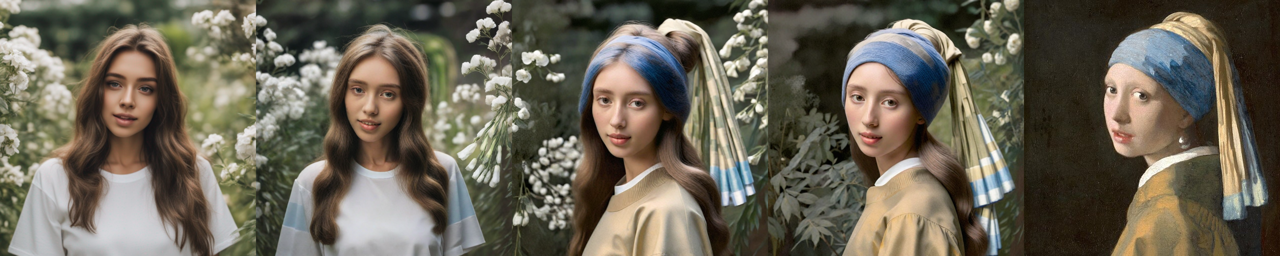

In [14]:
size = xl_pipe.default_sample_size
latent = torch.randn((1, 4, size, size,), device="cuda", dtype=dtype, generator=generator)

prompt_a = "masterpiece, best quality, A girl in the woods"
prompt_b = "masterpiece, best quality, Het meisje met de parel, by Vermeer"
negative_prompt = "nsfw, lowres, (bad), text, error, fewer, extra, missing, worst quality, jpeg artifacts, low quality, watermark, unfinished, displeasing, oldest, early, chromatic aberration, signature, extra digits, artistic error, username, scan, [abstract]"

image_a = Image.open("asset/girl.jpg")
image_b = Image.open("asset/vermeer.jpg")
images = beta_pipe.generate_interpolation(
    prompt_a,
    prompt_b,
    negative_prompt,
    latent,
    latent,
    image_start=image_a,
    image_end=image_b,
    num_inference_steps=28,
    exploration_size=8,
    interpolation_size=5,
    warmup_ratio=0.1
)
images[0] = image_a.resize((1024, 1024))
images[-1] = image_b.resize((1024, 1024))
show_image = image_grids(images, 1, 5).resize((5 * 256, 256))
show_image

### Scale Control of Image Prompt

In [15]:
xl_pipe.load_interpolated_ip_adapter("ozzygt/sdxl-ip-adapter", "", weight_name="ip-adapter-plus_sdxl_vit-h.safetensors", early="scale_control")

  0%|          | 0/28 [00:00<?, ?it/s]

Alpha: 1 | Beta: 1 | Current Coefs: [0.0, 0.5, 1.0] | Current Distances: [tensor(0.1109), tensor(0.1340)]


  0%|          | 0/28 [00:00<?, ?it/s]

--------Exploration: 4 / 7--------
Alpha: 2.922744062800841 | Beta: 2.485401683332333 | Current Coefs: [0.0, 0.5, 0.75, 1.0] | Current Distances: [tensor(0.1109), tensor(0.1105), tensor(0.0430)]


  0%|          | 0/28 [00:00<?, ?it/s]

--------Exploration: 5 / 7--------
Alpha: 1.8705194375524319 | Beta: 1.9615521652485834 | Current Coefs: [0.0, 0.3666946732997037, 0.5, 0.75, 1.0] | Current Distances: [tensor(0.1052), tensor(0.0501), tensor(0.1105), tensor(0.0430)]


  0%|          | 0/28 [00:00<?, ?it/s]

--------Exploration: 6 / 7--------
Alpha: 1.7924700820105242 | Beta: 1.792318276400388 | Current Coefs: [0.0, 0.3666946732997037, 0.5, 0.615905777512483, 0.75, 1.0] | Current Distances: [tensor(0.1052), tensor(0.0501), tensor(0.0422), tensor(0.0746), tensor(0.0430)]


  0%|          | 0/28 [00:00<?, ?it/s]

--------Exploration: 7 / 7--------
Alpha: 1.1829991924988819 | Beta: 1.5178984719198045 | Current Coefs: [0.0, 0.2379479658580842, 0.3666946732997037, 0.5, 0.615905777512483, 0.75, 1.0] | Current Distances: [tensor(0.1039), tensor(0.0685), tensor(0.0501), tensor(0.0422), tensor(0.0746), tensor(0.0430)]
Optimal smooth path: [0, 1, 2, 4, 6]


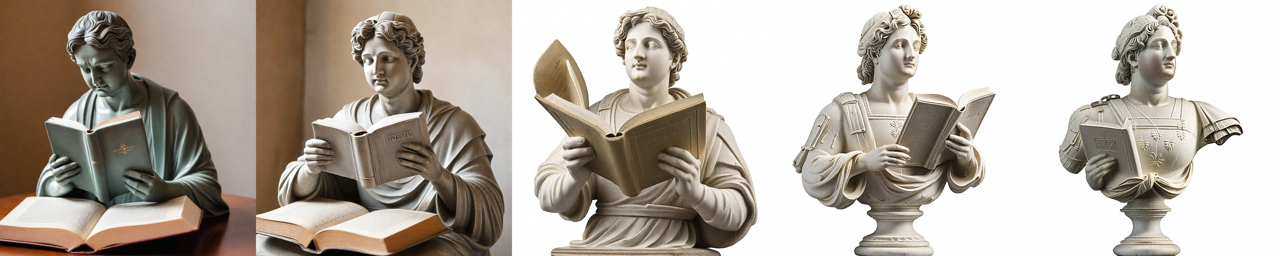

In [23]:
text_prompt = "best quality, high quality, a statue is reading the book"
image_prompt = Image.open("asset/statue.jpg")
images = beta_pipe.generate_interpolation(
    text_prompt,
    text_prompt, # same text prompt for controlling the impact of image prompt
    negative_prompt,
    latent,
    latent,
    num_inference_steps=28,
    exploration_size=7,
    interpolation_size=5,
    image_start=None, # no image prompt for the start point
    image_end=image_prompt,
    output_type="pil",
    warmup_ratio=0.2,
    init_alpha=1,
    init_beta=1
)
show_image = image_grids(images, 1, 5).resize((5 * 256, 256))
show_image
